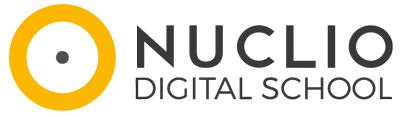


# **Modulo 4. Análisis de datos - Proyecto final**



# **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024


In [1]:
#La imagen me ralentiza el visual studio

## Paso 1. Importar librerías

In [2]:
#Librería
import pandas as pd
import numpy as np


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Nulos
import missingno as msn
import os
import re
import sys


## Paso 2. Cargar datos

In [3]:
#Capturar archivo de datos
path = r'C:\Users\xxaby\Desktop\master\M4Analiticsexploratorio\proyectofinal'
file2019 = 'Campeonato Europeo de Halterofilia de 2019 datos original.csv'
file2020 = 'Campeonato Europeo de Halterofilia de 2020 datos original.csv'
funciones_auxiliares = 'funciones_auxiliares_done.py'


ruta_completa2019 = os.path.join(path, file2019)
ruta_completa2020 = os.path.join(path, file2020)


#Cargar el archivo Excel
df2019 = pd.read_csv(ruta_completa2019)
#df2019
#df2019.count()


df2020 = pd.read_csv(ruta_completa2020)
#df2020
##df2020.count()


## Paso 3. Exploración inicial

In [4]:

#Exportamos la funcion para realizar la exploración inicial
from funciones_auxiliares_done import leer_archivo


#Capturamos todos los archivos .csv de la ubicación 
path = r'C:\Users\xxaby\Desktop\master\M4Analiticsexploratorio\proyectofinal'
lista_ficheros_validos = [f for f in os.listdir(path) if f.endswith('.csv')]


diccionario_datos = {}

for file in lista_ficheros_validos:
    ruta_completa = os.path.join(path, file)
    df = leer_archivo(ruta_completa)
    diccionario_datos[file] = df


for file, df in diccionario_datos.items():    
    print(f"Archivo: {file}")
    print('*' *90)
    display(df)
    print('-' *90)
    print(' Estas son las columnas del conjunto de datos:')
    print(df.columns.tolist())
    print('-' *90)
    print(' Estas son los nulos del conjunto de datos:')
    print(df.isnull().sum())

print('#' *90)
print(f"Total archivos cargados: {len(diccionario_datos)}")
print("Archivos:", list(diccionario_datos.keys()))

Archivo: Campeonato Europeo de Halterofilia de 2019 datos original.csv
******************************************************************************************


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


------------------------------------------------------------------------------------------
 Estas son las columnas del conjunto de datos:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']
------------------------------------------------------------------------------------------
 Estas son los nulos del conjunto de datos:
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64
Archivo: Campeonato Europeo de Halterofilia de 2020 datos original.csv
******************************************************************************************


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino
5,89 kg (08.04),Karen Avaguian Armenia 175 + 200 = 375,Revaz Davitadze Georgia 171 + 203 = 374,Andranik Karapetian Armenia 170 + 195 = 365,2020,Masculino
6,96 kg (09.04),Anton Pliesnoi Georgia 180 + 213 = 393,Piotr Asayonak Bielorrusia 172 + 202 = 374,Hakob Mkrtchian Armenia 160 + 212 = 372,2020,Masculino
7,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,2020,Masculino
8,109 kg (10.04),Dmytro Chumak Ucrania 181 + 226 = 407,Jristo Jristov Bulgaria 186 + 220 = 406,Timur Naniyev Rusia 184 + 217 = 401,2020,Masculino
9,+109 kg (11.04),Lasha Talajadze Georgia 222 + 263 = 485,Gor Minasian Armenia 216 + 248 = 464,Varazdat Lalayan Armenia 205 + 240 = 445,2020,Masculino


------------------------------------------------------------------------------------------
 Estas son las columnas del conjunto de datos:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']
------------------------------------------------------------------------------------------
 Estas son los nulos del conjunto de datos:
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64
##########################################################################################
Total archivos cargados: 2
Archivos: ['Campeonato Europeo de Halterofilia de 2019 datos original.csv', 'Campeonato Europeo de Halterofilia de 2020 datos original.csv']


## Paso 4. Crear un único dataframe con los datos de 2019 y 2020

In [5]:
df = pd.concat([df2019, df2020], ignore_index=True)
#df.count()


# remplazamos el año por tema de que no se celebraron ese año
df['Año'] = df['Año'].astype(str).replace('2020','2021')
df_inicial = df

#mostramos por pantalla
df_inicial

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [6]:

#Transformar a Formato Largo (Melt)convertimos las columnas 'Oro', 'Plata', 'Bronce' en filas.
df_transformar_datos = pd.melt(df_inicial,id_vars=['Eventos', 'Año', 'Genero'],value_vars=['Oro', 'Plata', 'Bronce'],var_name='Medalla',value_name='Atleta')

#Mostramos el dataframe en orden
df_transformar_datos = df_transformar_datos[['Eventos', 'Año', 'Genero', 'Medalla', 'Atleta']]
df_transformar_datos
#df_transformar_datos.to_csv(r'C:\Users\xxaby\Desktop\master\M4Analiticsexploratorio\proyectofinal\original.csv')

,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356
...,...,...,...,...,...
115,71 kg (07.04),2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218
116,76 kg (08.04),2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243
117,81 kg (09.04),2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227
118,87 kg (10.04),2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240


In [7]:

#Transformar a Formato Largo (Melt)convertimos las columnas 'Oro', 'Plata', 'Bronce' en filas
df_transformar_datos = pd.melt(df_inicial,id_vars=['Eventos', 'Año', 'Genero'],value_vars=['Oro', 'Plata', 'Bronce'], var_name='Medalla',value_name='Atleta')

#obtenemos la ultiam parte de Atleta para generar la columna Total
partes_pre_total = df_transformar_datos['Atleta'].str.split('=', expand=True, n=1).iloc[:, 0].str.strip()
total_str = df_transformar_datos['Atleta'].str.split('=', expand=True, n=1).iloc[:, 1].str.strip()
df_transformar_datos['Total'] = pd.to_numeric(total_str, errors='coerce').astype('Int64')

#Mostramos el dataframe en orden
df_transformar_datos = df_transformar_datos[['Eventos', 'Año', 'Genero', 'Medalla', 'Atleta','Total']]

#Mostramos por pantalla
#Aunque en total nos aparece con <NA> es debido a que aun no hemos limpiado el codigo lo cual mas adelante quitaremos el [n 1]
df_transformar_datos


,Eventos,Año,Genero,Medalla,Atleta,Total
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​,<NA>
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,356
...,...,...,...,...,...,...
115,71 kg (07.04),2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218,218
116,76 kg (08.04),2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,243
117,81 kg (09.04),2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227,227
118,87 kg (10.04),2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240,240


In [8]:

#comprovacion para calcula la medalla por el resultado 
max_total_oro = df_transformar_datos.loc[df_transformar_datos['Medalla'] == 'Oro', 'Total'].max()
print(max_total_oro)
max_total_oro = df_transformar_datos.loc[df_transformar_datos['Medalla'] == 'Oro', 'Total'].min()
print(max_total_oro)
print('oro')

max_total_oro = df_transformar_datos.loc[df_transformar_datos['Medalla'] == 'Plata', 'Total'].max()
print(max_total_oro)
max_total_oro = df_transformar_datos.loc[df_transformar_datos['Medalla'] == 'Plata', 'Total'].min()
print(max_total_oro)
print('plata')

max_total_oro = df_transformar_datos.loc[df_transformar_datos['Medalla'] == 'Bronce', 'Total'].max()
print(max_total_oro)
max_total_oro = df_transformar_datos.loc[df_transformar_datos['Medalla'] == 'Bronce', 'Total'].min()
print(max_total_oro)
print('brocne')

485
189
oro
464
180
plata
445
178
brocne


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

|   Fecha  | Nombre  | Apellido |   País   | Resultados | Arrancada | Dos tiempos | Total |
|----------|---------|----------|----------|------------|-----------|-------------|-------|



In [9]:

#capturamso el data frame anterior 
df_creacion_columnas = df_transformar_datos.rename(columns={'Atleta': 'Resultados'})

#capturar la fecha de la columna eventos
df_creacion_columnas['Dia_Mes'] = df_creacion_columnas['Eventos'].str.split('(', expand=True).iloc[:, 1]
df_creacion_columnas['Dia_Mes'] = df_creacion_columnas['Dia_Mes'].str.replace(')', '', regex=False).str.replace('(', '', regex=False)
df_creacion_columnas['Fecha_String_Temp'] = df_creacion_columnas['Dia_Mes'] + '.' + df_creacion_columnas['Año'].astype(str)
#unir la fecha y el año de las dos columnas 
df_creacion_columnas['Fecha'] = pd.to_datetime(df_creacion_columnas['Fecha_String_Temp'], format='%d.%m.%Y', errors='coerce').dt.strftime('%d-%m-%Y')


#realizamos split para obtener Resultados
df_creacion_columnas['Resultados'] = df_creacion_columnas['Resultados'].str.replace(r'\u200b', '', regex=True)
df_creacion_columnas['Resultados'] = df_creacion_columnas['Resultados'].str.replace(r'\[.*?\]', '', regex=True)
df_creacion_columnas['Resultados'] = df_creacion_columnas['Resultados'].str.strip()

#realizamos split para obtener el total
partes_pre_total = df_creacion_columnas['Resultados'].str.split('=', expand=True, n=1).iloc[:, 0].str.strip()
total_str = df_creacion_columnas['Resultados'].str.split('=', expand=True, n=1).iloc[:, 1].str.strip()
df_creacion_columnas['Total'] = pd.to_numeric(total_str, errors='coerce').astype('Int64')

#realizamos split para obtener Dos Tiempos
partes_antes_dos_tiempos = partes_pre_total.str.split('+', expand=True, n=1).iloc[:, 0].str.strip()
dos_tiempos_str = partes_pre_total.str.split('+', expand=True, n=1).iloc[:, 1].str.strip()
df_creacion_columnas['Dos tiempos'] = pd.to_numeric(dos_tiempos_str, errors='coerce').astype('Int64')

#realizamos split para obtener la arrancada
texto_nombre_pais = partes_antes_dos_tiempos.str.rsplit(' ', n=1, expand=True).iloc[:, 0].str.strip()
arrancada_str = partes_antes_dos_tiempos.str.rsplit(' ', n=1, expand=True).iloc[:, 1].str.strip()
df_creacion_columnas['Arrancada'] = pd.to_numeric(arrancada_str, errors='coerce').astype('Int64')

#realizamos split para obtener el pais 
df_creacion_columnas['País'] = texto_nombre_pais.str.split(' ').str[-1].str.strip()
temp_nombre_apellido = texto_nombre_pais.apply(lambda x: ' '.join(x.split(' ')[:-1]).strip() if pd.notna(x) else None)
df_creacion_columnas[['Nombre', 'Apellido']] = temp_nombre_apellido.str.split(' ', n=1, expand=True)


#mostrar por pantalla
df_creacion_columnas = df_creacion_columnas[['Fecha', 'Nombre', 'Apellido',  'País',  'Resultados', 'Arrancada', 'Dos tiempos',  'Total']]
df_creacion_columnas

#| Fecha | Nombre | Apellido | País  | Resultados | Arrancada | Dos tiempos | Total |

,Fecha,Nombre,Apellido,País,Resultados,Arrancada,Dos tiempos,Total
0,06-04-2019,Mirco,Scarantino,Italia,Mirco Scarantino Italia 116 + 145 = 261,116,145,261
1,07-04-2019,Henadz,Laptseu,Bielorrusia,Henadz Laptseu Bielorrusia 133 + 153 = 286,133,153,286
2,08-04-2019,Bernardin,Matam,Francia,Bernardin Matam Francia 137 + 175 = 312,137,175,312
3,09-04-2019,Bozhidar,Andreev,Bulgaria,Bozhidar Andreev Bulgaria 153 + 192 = 345,153,192,345
4,10-04-2019,Antonino,Pizzolato,Italia,Antonino Pizzolato Italia 155 + 201 = 356,155,201,356
...,...,...,...,...,...,...,...,...
115,07-04-2021,Raluca,Olaru,Rumania,Raluca Olaru Rumania 98 + 120 = 218,98,120,218
116,08-04-2021,Anastasiya,Romanova,Rusia,Anastasiya Romanova Rusia 111 + 132 = 243,111,132,243
117,09-04-2021,Liana,Guiurdzhian,Armenia,Liana Guiurdzhian Armenia 98 + 129 = 227,98,129,227
118,10-04-2021,Daria,Riazanova,Rusia,Daria Riazanova Rusia 105 + 135 = 240,105,135,240


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [10]:
#| Fecha  | Nombre | Apellido | País | Resultados | Arrancada | Dos tiempos | Total |


# Crear df_columnas_ordenacion con las columnas base
df_columnas_ordenacion = df_creacion_columnas[['Fecha', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']]
df_columnas_ordenacion['Categoria'] = df_transformar_datos['Eventos']
df_columnas_ordenacion['Genero'] = df_transformar_datos['Genero']

# Nuevas columna para la Categoría
df_columnas_ordenacion['Categoria'] = df_columnas_ordenacion['Categoria'].str.split(' ').str[0]
#limpieza  datos d e la categoria
df_columnas_ordenacion['Categoria'] = df_columnas_ordenacion['Categoria'].str.replace('+','')
df_columnas_ordenacion['Categoria'] = df_columnas_ordenacion['Categoria'].str.replace('[n','')


# Nuevas columna de Medalla
df_columnas_ordenacion['Medalla'] = df_transformar_datos['Medalla']


# Reordenar columnas
df_columnas_ordenacion = df_columnas_ordenacion[['Genero', 'Categoria', 'Fecha', 'Medalla','Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']]

#mostramos por pantalla
df_columnas_ordenacion

#| Género | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Masculino,55 kg,06-04-2019,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,07-04-2019,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,08-04-2019,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,09-04-2019,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,10-04-2019,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,Femenino,71 kg,07-04-2021,Bronce,Raluca,Olaru,Rumania,98,120,218
116,Femenino,76 kg,08-04-2021,Bronce,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,81 kg,09-04-2021,Bronce,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,87 kg,10-04-2021,Bronce,Daria,Riazanova,Rusia,105,135,240


In [11]:
#filtrado por nulos, para revisarlos
df_filtrado = df_columnas_ordenacion[df_columnas_ordenacion['Medalla'].isnull()]
#df_filtrado = df_columnas_ordenacion.isnull()
df_filtrado

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [12]:

#conversion de cada columna
df_columnas_ordenacion['Genero'] = df_columnas_ordenacion['Genero'].astype('object')
df_columnas_ordenacion['Categoria'] = df_columnas_ordenacion['Categoria'].astype('category')
df_columnas_ordenacion['Fecha'] = pd.to_datetime(df_columnas_ordenacion['Fecha'], dayfirst=True)
df_columnas_ordenacion['Medalla'] = df_columnas_ordenacion['Medalla'].astype('category')
df_columnas_ordenacion['Nombre'] = df_columnas_ordenacion['Nombre'].astype('object')
df_columnas_ordenacion['Apellido'] = df_columnas_ordenacion['Apellido'].astype('object')
df_columnas_ordenacion['País'] = df_columnas_ordenacion['País'].astype('object')
df_columnas_ordenacion['Arrancada'] = df_columnas_ordenacion['Arrancada'].astype('int64')
df_columnas_ordenacion['Dos tiempos'] = df_columnas_ordenacion['Dos tiempos'].astype('int64')
df_columnas_ordenacion['Total'] = df_columnas_ordenacion['Total'].astype('int64')

#mostramos por pantalla
df_columnas_ordenacion


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Masculino,55 kg,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,Femenino,71 kg,2021-04-07,Bronce,Raluca,Olaru,Rumania,98,120,218
116,Femenino,76 kg,2021-04-08,Bronce,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,81 kg,2021-04-09,Bronce,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,87 kg,2021-04-10,Bronce,Daria,Riazanova,Rusia,105,135,240


## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2021-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2021-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2021-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2021-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2021-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [13]:

# Ordenamos las columnas , forzamos el orden , aunque en este caso ordenado de forma ascendente ya aparece correctamente por el 'F' y 'M' del orden alfabetico
orden_genero = ['Femenino', 'Masculino']
df_columnas_ordenacion['Genero'] = pd.Categorical(df_columnas_ordenacion['Genero'], categories=orden_genero)

# Eliminar 'kg' y espacios en Categoria
df_columnas_ordenacion['Categoria'] = df_columnas_ordenacion['Categoria'].str.replace('kg', '', case=False).str.strip()

# Marcamos el orden de la categoria
orden_categoria = ['45', '49', '55', '59', '61', '64', '67', '71', '73', '76', '81', '87', '+87', '89', '96', '102', '109', '+109']
df_columnas_ordenacion['Categoria'] = pd.Categorical(df_columnas_ordenacion['Categoria'], categories=orden_categoria)

# Marcamos el orden de la Medallas
orden_medalla = ['Oro', 'Plata', 'Bronce']
df_columnas_ordenacion['Medalla'] = pd.Categorical(df_columnas_ordenacion['Medalla'], categories=orden_medalla)

# Ordenar por Genero, Categoría y Medalla
df_columnas_ordenacion = df_columnas_ordenacion.sort_values(['Genero',  'Categoria', 'Fecha', 'Medalla']).reset_index(drop=True)

# Mostrasr DataFrame ordenado
df_columnas_ordenacion

,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
1,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
2,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
3,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
4,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
...,...,...,...,...,...,...,...,...,...,...
115,Masculino,109,2021-04-10,Plata,Jristo,Jristov,Bulgaria,186,220,406
116,Masculino,109,2021-04-10,Bronce,Timur,Naniyev,Rusia,184,217,401
117,Masculino,109,2021-04-11,Oro,Lasha,Talajadze,Georgia,222,263,485
118,Masculino,109,2021-04-11,Plata,Gor,Minasian,Armenia,216,248,464


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [14]:
#Traspaso de datos
df_EDA = df_columnas_ordenacion

#informacion dataFrame
print("Información general:")
print(df_EDA.info())

#primeras filas
print("\nPrimeras filas:")
print(df_EDA.head(5))

#valores unicos
print(df_EDA.nunique())

#Estadisticas descriptivas
print("\nEstadísticas descriptivas:")
print(df_EDA.describe(include='all'))

#valores nulos por columna
print("\nValores nulos por columna:")
print(df_EDA.isnull().sum())

#Duplicados
print("\nNúmero de filas duplicadas:")
print(df_EDA.duplicated().sum())

#valores unicos por columna
print("\nValores únicos por columna:")
print(df_EDA.nunique())

#Distribucion de medallas
print("\nDistribución de medallas:")
print(df_EDA['Medalla'].value_counts())

#Top 5 países con más participaciones
print("\nTop 5 países con más participaciones:")
print(df_EDA['País'].value_counts().head(5))


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Genero       120 non-null    category      
 1   Categoria    120 non-null    category      
 2   Fecha        120 non-null    datetime64[ns]
 3   Medalla      120 non-null    category      
 4   Nombre       120 non-null    object        
 5   Apellido     120 non-null    object        
 6   País         120 non-null    object        
 7   Arrancada    120 non-null    int64         
 8   Dos tiempos  120 non-null    int64         
 9   Total        120 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(3), object(3)
memory usage: 8.0+ KB
None

Primeras filas:
     Genero Categoria      Fecha Medalla    Nombre  Apellido         País  \
0  Femenino        45 2019-04-06     Oro    Şaziye   Erdoğan      Turquía   
1  Femenino        45 2019-0

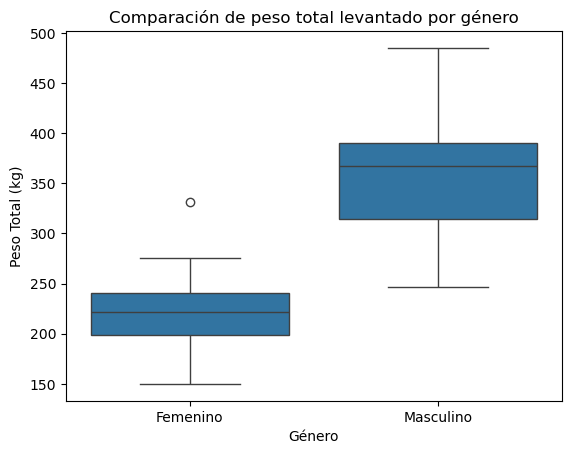

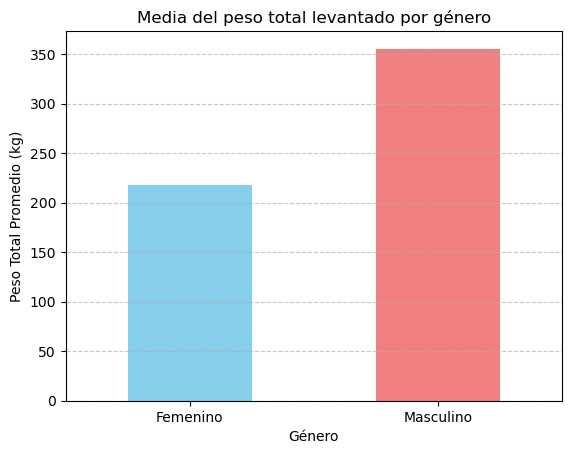

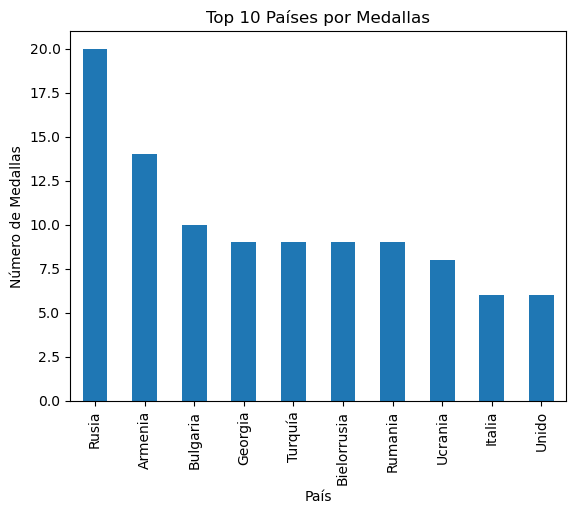

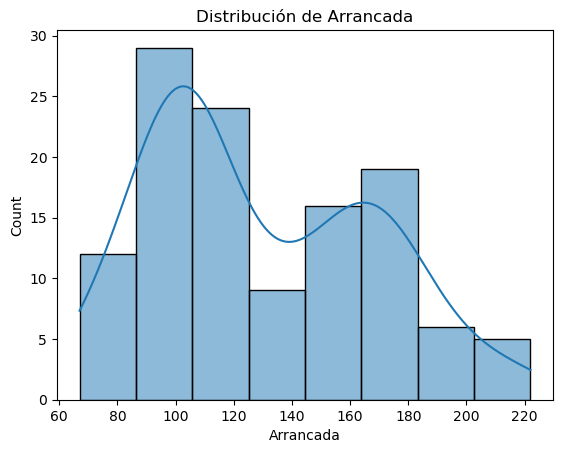

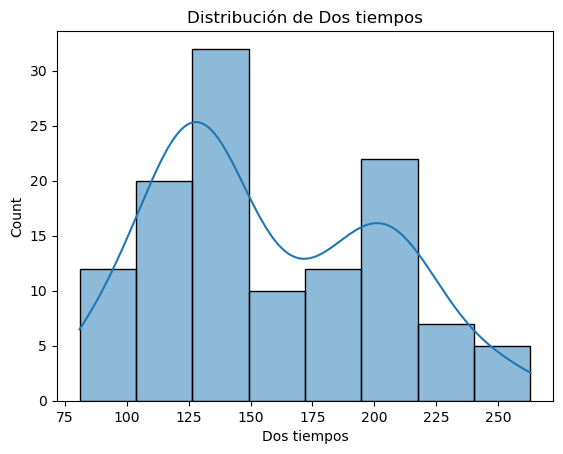

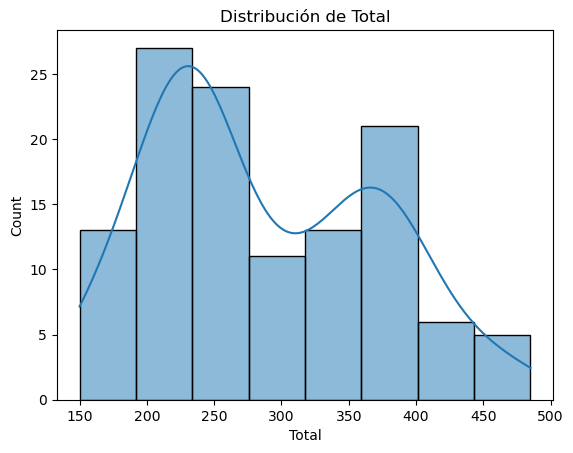

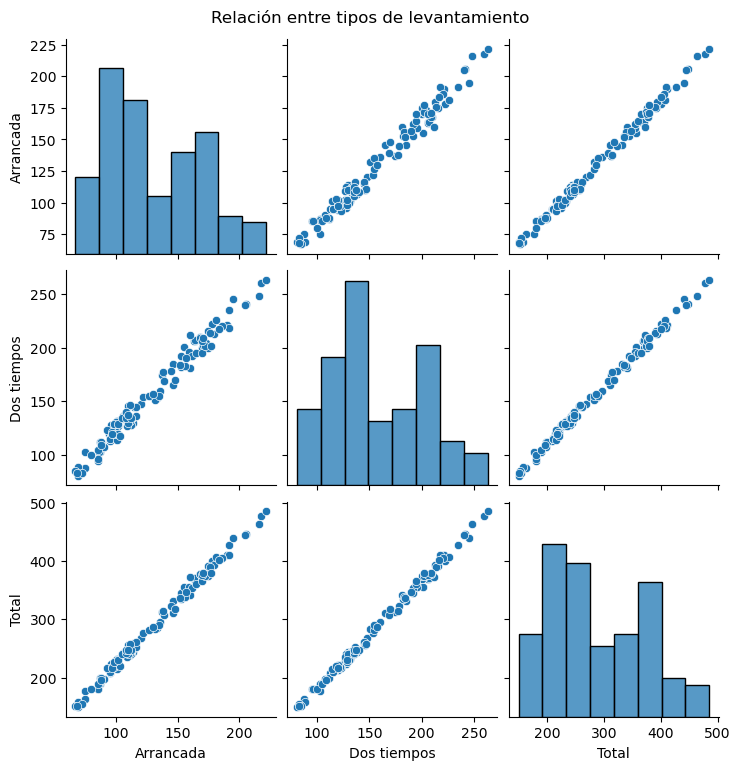

In [15]:
#Comparación de peso entre géneros
df_EDA['Total'] = pd.to_numeric(df_EDA['Total'], errors='coerce')
sns.boxplot(data=df_EDA, x='Genero', y='Total')
plt.title('Comparación de peso total levantado por género')
plt.ylabel('Peso Total (kg)')
plt.xlabel('Género')
plt.show()

#Media por género
medias = df_EDA.groupby('Genero')['Total'].mean()
medias.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Media del peso total levantado por género')
plt.ylabel('Peso Total Promedio (kg)')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Medallas por país
medallas_pais = df_EDA[df_EDA['Medalla'].notnull()].groupby('País')['Medalla'].count().sort_values(ascending=False)
medallas_pais.head(10).plot(kind='bar')
plt.title('Top 10 Países por Medallas')
plt.ylabel('Número de Medallas')
plt.show()

#Distribución de "Arrancada", "Dos tiempos" y "Total"
for col in ['Arrancada', 'Dos tiempos', 'Total']:
    sns.histplot(data=df_EDA, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

#Relación entre pesos levantados
sns.pairplot(df_EDA[['Arrancada', 'Dos tiempos', 'Total']])
plt.suptitle('Relación entre tipos de levantamiento', y=1.02)
plt.show()

## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [16]:
#filtrar filas con medalla
medallas = df_EDA[df_EDA['Medalla'].notnull()]

#contar medallas por pais y tipo
medallas_por_pais = medallas.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

#mostrar por pantalla
medallas_por_pais

Medalla,Oro,Plata,Bronce
País,,,
Albania,0,1,1
Alemania,1,1,0
Armenia,4,3,7
Austria,0,0,1
Azerbaiyán,1,0,1
Bielorrusia,3,3,3
Bulgaria,4,5,1
Bélgica,0,1,1
España,0,1,0


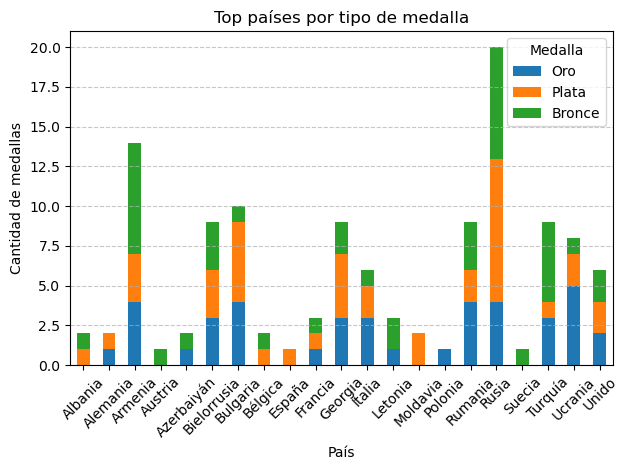

In [17]:
#Filtrar filas con medalla
medallas = df_EDA[df_EDA['Medalla'].notnull()]

#Contar medallas por país y tipo
medallas_por_pais = medallas.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

#Mostrar por pantalla
medallas_por_pais.plot(kind='bar', stacked=True)
plt.title('Top países por tipo de medalla')
plt.ylabel('Cantidad de medallas')
plt.xlabel('País')
plt.legend(title='Medalla')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

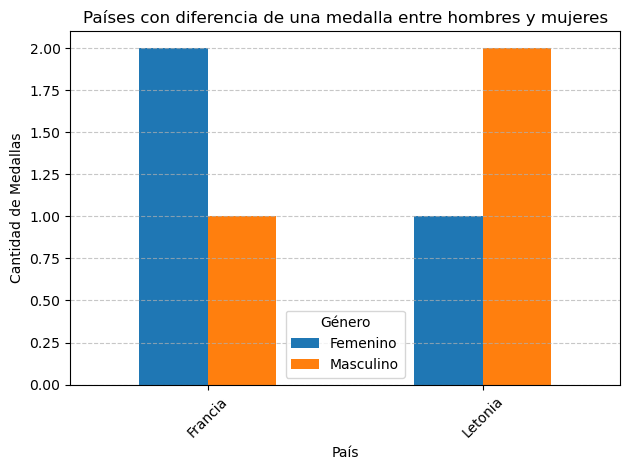

In [18]:
#Filtrar filas con medalla
medallas = df_EDA[df_EDA['Medalla'].notnull()]

#Contar medallas por país y género
medallas_genero = medallas.groupby(['País', 'Genero']).size().unstack(fill_value=0)

#Filtrar países con medallas en ambos géneros
medallas_genero_filtrado = medallas_genero[(medallas_genero.get('Masculino', 0) > 0) & (medallas_genero.get('Femenino', 0) > 0)]

#Calcular diferencia
medallas_genero_filtrado['Diferencia'] = abs(medallas_genero_filtrado['Masculino'] - medallas_genero_filtrado['Femenino'])


#Filtrar los que tienen diferencia EXACTA de 1
equilibrados_dif1 = medallas_genero_filtrado[medallas_genero_filtrado['Diferencia'] == 1]

#Quitar columna 'Diferencia' para graficar
equilibrados_dif1_plot = equilibrados_dif1.drop(columns='Diferencia')

#Diferencia de una medalla entre hombres y mujeres
equilibrados_dif1_plot.plot(kind='bar')
plt.title('Países con diferencia de una medalla entre hombres y mujeres')
plt.ylabel('Cantidad de Medallas')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

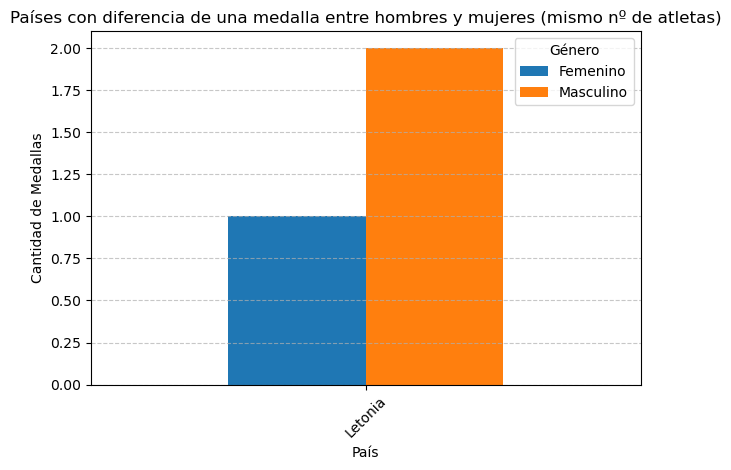

In [19]:

#Asegurar que los datos están limpios
df_EDA['Medalla'] = df_EDA['Medalla'].astype(str)
df_EDA = df_EDA.dropna(subset=['Genero', 'País', 'Nombre'])

#Contar número de atletas por país y género
conteo_atletas = df_EDA.groupby(['País', 'Genero'])['Nombre'].nunique().unstack(fill_value=0)

#Filtrar países con mismo número de hombres y mujeres
paises_balanceados = conteo_atletas[conteo_atletas.get('Masculino', 0) == conteo_atletas.get('Femenino', 0)].index

#Filtrar DataFrame con esos países
df_equilibrado = df_EDA[df_EDA['País'].isin(paises_balanceados)]

#Filtrar filas con medalla
medallas = df_equilibrado[df_equilibrado['Medalla'].notnull()]

#Contar medallas por país y género
medallas_genero = medallas.groupby(['País', 'Genero']).size().unstack(fill_value=0)

#Filtrar países con medallas en ambos géneros
medallas_genero_filtrado = medallas_genero[(medallas_genero.get('Masculino', 0) > 0) & (medallas_genero.get('Femenino', 0) > 0)]

#Calcular diferencia absoluta
medallas_genero_filtrado['Diferencia'] = abs(medallas_genero_filtrado['Masculino'] - medallas_genero_filtrado['Femenino'])

#Quedarse con diferencia exacta de 1
equilibrados_dif1 = medallas_genero_filtrado[medallas_genero_filtrado['Diferencia'] == 1]

#Preparar para graficar
equilibrados_dif1_plot = equilibrados_dif1.drop(columns='Diferencia')

#Graficar
equilibrados_dif1_plot.plot(kind='bar')
plt.title('Países con diferencia de una medalla entre hombres y mujeres (mismo nº de atletas)')
plt.ylabel('Cantidad de Medallas')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [20]:
#Contar número de atletas por país y género
conteo_atletas = df_EDA.groupby(['País', 'Genero'])['Nombre'].nunique().unstack(fill_value=0)

#Filtrar países con igual número de hombres y mujeres
paises_balanceados = conteo_atletas[conteo_atletas['Masculino'] == conteo_atletas['Femenino']].index
print(paises_balanceados)

#Filtrar el DataFrame original solo con esos países
#df_equilibrado = df_EDA[df_EDA['País'].isin(paises_balanceados)]
#df_equilibrado

Index(['Alemania', 'Azerbaiyán', 'Letonia', 'Moldavia'], dtype='object', name='País')


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

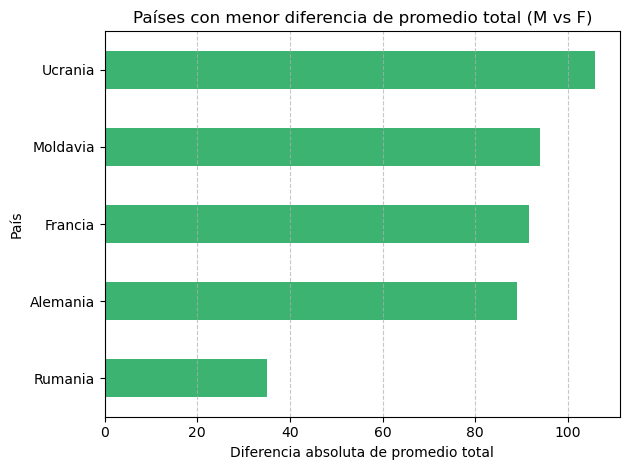

In [21]:

#Calcular promedio de 'Total' por país y género
promedios = df_EDA.groupby(['País', 'Genero'])['Total'].mean().unstack()

#Calcular diferencia absoluta entre medias por pais
promedios['Diferencia'] = (promedios['Masculino'] - promedios['Femenino']).abs()

#Ordenar por menor diferencia
promedios_ordenado = promedios.sort_values('Diferencia')

#Mostrar el pais con menor diferencia
#print("País con menor diferencia:")
#print(promedios_ordenado.head())

#Gráfico de menores diferencias
promedios_ordenado.head()['Diferencia'].plot(kind='barh', color='mediumseagreen')
plt.title('Países con menor diferencia de promedio total (M vs F)')
plt.xlabel('Diferencia absoluta de promedio total')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Fase 2.** Web scraping

## Paso 1. Importar librerías

In [22]:

#Librería
import pandas as pd
import numpy as np


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bs4 import BeautifulSoup

# Nulos
import missingno as msn
import os
import re
import sys

## Paso 2. Cargar datos

In [23]:
import os
#Ruta para guardar los archivos generados apartir de los datos de la web
path = r'C:\Users\xxaby\Desktop\master\M4Analiticsexploratorio\proyectofinal'

#columnas que se generaran
list_columnas_nuevas = ['Evento', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']
diccionario_datos = {}

url1 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022'
url2 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023'
url3 = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024'


lista_urls = [url1, url2, url3]

diccionario_datos_wikipedia = {}
for url in lista_urls:
    año = url.split('_')[-1]
    print(año)
    lista_datos = pd.read_html(url)
    for pos, df in enumerate(lista_datos):
        #Nos quedamos con las tablas cuya primera columna sea "Evento"
        lista_columnas = df.columns.tolist()
        #if lista_columnas[0] == 'Evento':
        if 'Evento' in lista_columnas:
             print(f'Posicion {pos}')
             df['año'] = año
             #df['Evento']
             condicion_genero = df['Evento'].iloc[0][0:2] == '45'
             if condicion_genero:
                genero = 'Femenino'
             else:
                genero = 'Masculino'
             df['genero'] = genero

             df.columns = list_columnas_nuevas
             diccionario_datos_wikipedia[f'{año}_{genero}'] = df

             file = f'{año}_{genero}.xls'
             print(file)
             ruta_exportacion = os.path.join(path, file)
            
             df.to_csv(ruta_exportacion, index = False)



2022
Posicion 2
2022_Masculino.xls
Posicion 3
2022_Femenino.xls
2023
Posicion 2
2023_Masculino.xls
Posicion 3
2023_Femenino.xls
2024
Posicion 2
2024_Masculino.xls
Posicion 3
2024_Femenino.xls


In [24]:
#Concatenar todos los DataFrames en uno solo
df_web = pd.concat(diccionario_datos_wikipedia.values(), ignore_index=True)


#modificamos el nombre de 'Evento' por el de 'Eventos" para poder agrupar los mismos datos
df_web.rename(columns={'Evento': 'Eventos'}, inplace=True)


#Mostrar por pantalla parte de la pagian web
df_web

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,2022,Masculino
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,2022,Masculino
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,2022,Masculino
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,2022,Masculino
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,2022,Masculino
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,2022,Masculino
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,2022,Masculino
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,2022,Masculino
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,2022,Masculino
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,2022,Masculino


In [25]:
#Capturar archivo de datos
path = r'C:\Users\xxaby\Desktop\master\M4Analiticsexploratorio\proyectofinal'
file2019 = 'Campeonato Europeo de Halterofilia de 2019 datos original.csv'
file2020 = 'Campeonato Europeo de Halterofilia de 2020 datos original.csv'
funciones_auxiliares = 'funciones_auxiliares_done.py'


ruta_completa2019 = os.path.join(path, file2019)
ruta_completa2020 = os.path.join(path, file2020)


#Cargar el archivo Excel
df2019 = pd.read_csv(ruta_completa2019)
#df2019
#df2019.count()


df2020 = pd.read_csv(ruta_completa2020)
#df2020
##df2020.count()


In [26]:
#Juntamos en un único dataframe los archivos 2 archivos iniciales .csv
df_archivo = pd.concat([df2019, df2020], ignore_index=True)
#df.count()

#Remplazamos el año por tema de que no se celebraron ese año
df_archivo['Año'] = df_archivo['Año'].astype(str).replace('2020','2021')


df_archivo = df_archivo
#Mostrar por pantalla parte de archivos
df_archivo

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


## Paso 3. Exploración inicial

In [27]:

#Exportamos la función para realizar la exploración inicial
from funciones_auxiliares_done import leer_archivo
from IPython.display import display

#captura de todos los archivos, tanto los anteriores de la primera fase como tambien los nuevos creados apartir del scraping
path = r'C:\Users\xxaby\Desktop\master\M4Analiticsexploratorio\proyectofinal'
lista_ficheros_validos = [f for f in os.listdir(path) if f.endswith(('.csv', '.xls'))]

diccionario_datos = {}

for file in lista_ficheros_validos:
    ruta_completa = os.path.join(path, file)
    try:
        if file.endswith('.csv'):
            df = pd.read_csv(ruta_completa)
        elif file.endswith('.xlsx'):
            df = pd.read_excel(ruta_completa, engine='openpyxl')
        diccionario_datos[file] = df
    except Exception as e:
        print(f"Error inesperado: {e}")
        print(f"Error: {file} no pudo ser leído.")

for file, df in diccionario_datos.items():
    print(f"Archivo: {file}")
    print('*' * 90)
    display(df)
    print('-' * 90)
    print('Estas son las columnas del conjunto de datos:')
    print(df.columns.tolist())
    print('-' * 90)
    print('Estas son los nulos del conjunto de datos:')
    print(df.isnull().sum())

print('#' * 90)
print(f"Total archivos cargados: {len(diccionario_datos)}")
print("Archivos:", list(diccionario_datos.keys()))



Archivo: 2022_Femenino.xls
******************************************************************************************


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q117730960


------------------------------------------------------------------------------------------
Estas son las columnas del conjunto de datos:
[0, 1]
------------------------------------------------------------------------------------------
Estas son los nulos del conjunto de datos:
0    0
1    0
dtype: int64
Archivo: 2022_Masculino.xls
******************************************************************************************


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q117730960


------------------------------------------------------------------------------------------
Estas son las columnas del conjunto de datos:
[0, 1]
------------------------------------------------------------------------------------------
Estas son los nulos del conjunto de datos:
0    0
1    0
dtype: int64
Archivo: 2023_Femenino.xls
******************************************************************************************


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q117730960


------------------------------------------------------------------------------------------
Estas son las columnas del conjunto de datos:
[0, 1]
------------------------------------------------------------------------------------------
Estas son los nulos del conjunto de datos:
0    0
1    0
dtype: int64
Archivo: 2023_Masculino.xls
******************************************************************************************


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q117730960


------------------------------------------------------------------------------------------
Estas son las columnas del conjunto de datos:
[0, 1]
------------------------------------------------------------------------------------------
Estas son los nulos del conjunto de datos:
0    0
1    0
dtype: int64
Archivo: 2024_Femenino.xls
******************************************************************************************


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q117730960


------------------------------------------------------------------------------------------
Estas son las columnas del conjunto de datos:
[0, 1]
------------------------------------------------------------------------------------------
Estas son los nulos del conjunto de datos:
0    0
1    0
dtype: int64
Archivo: 2024_Masculino.xls
******************************************************************************************


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q117730960


------------------------------------------------------------------------------------------
Estas son las columnas del conjunto de datos:
[0, 1]
------------------------------------------------------------------------------------------
Estas son los nulos del conjunto de datos:
0    0
1    0
dtype: int64
Archivo: Campeonato Europeo de Halterofilia de 2019 datos original.csv
******************************************************************************************


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


------------------------------------------------------------------------------------------
Estas son las columnas del conjunto de datos:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']
------------------------------------------------------------------------------------------
Estas son los nulos del conjunto de datos:
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64
Archivo: Campeonato Europeo de Halterofilia de 2020 datos original.csv
******************************************************************************************


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino
5,89 kg (08.04),Karen Avaguian Armenia 175 + 200 = 375,Revaz Davitadze Georgia 171 + 203 = 374,Andranik Karapetian Armenia 170 + 195 = 365,2020,Masculino
6,96 kg (09.04),Anton Pliesnoi Georgia 180 + 213 = 393,Piotr Asayonak Bielorrusia 172 + 202 = 374,Hakob Mkrtchian Armenia 160 + 212 = 372,2020,Masculino
7,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,2020,Masculino
8,109 kg (10.04),Dmytro Chumak Ucrania 181 + 226 = 407,Jristo Jristov Bulgaria 186 + 220 = 406,Timur Naniyev Rusia 184 + 217 = 401,2020,Masculino
9,+109 kg (11.04),Lasha Talajadze Georgia 222 + 263 = 485,Gor Minasian Armenia 216 + 248 = 464,Varazdat Lalayan Armenia 205 + 240 = 445,2020,Masculino


------------------------------------------------------------------------------------------
Estas son las columnas del conjunto de datos:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']
------------------------------------------------------------------------------------------
Estas son los nulos del conjunto de datos:
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64
##########################################################################################
Total archivos cargados: 8
Archivos: ['2022_Femenino.xls', '2022_Masculino.xls', '2023_Femenino.xls', '2023_Masculino.xls', '2024_Femenino.xls', '2024_Masculino.xls', 'Campeonato Europeo de Halterofilia de 2019 datos original.csv', 'Campeonato Europeo de Halterofilia de 2020 datos original.csv']


## Paso 4. Crear un único dataframe con los datos de 2019, 2021, 2022, 2023 y 2024

In [28]:

#juntamos los dataframes de las webs y de los archivos
df_inicialf2 = pd.concat([df_archivo, df_web], ignore_index=True)

#mostramos por pantalla
df_inicialf2
#df_inicialf2.count() #resultado 100 total de todas las filas



,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
...,...,...,...,...,...,...
95,71 kg (16.02),Loredana Toma Rumania 114 + 127 = 241,Siuzanna Valodzka AIN[a 1]​ 105 + 130 = 235,Lisa Marie Schweizer Alemania 107 + 124 = 231,2024,Femenino
96,76 kg (17.02),Genna Toko Kegne Italia 101 + 120 = 221,Nikol Rubanovich Israel 99 + 117 = 216,Lara Dancz Alemania 101 + 114 = 215,2024,Femenino
97,81 kg (18.02),Weronika Zielińska-Stubińska Polonia 103 + 13...,Elena Erighina Moldavia 103+ 131 = 234,Dilara Narin Turquía 97 + 125 = 222,2024,Femenino
98,87 kg (19.02),Solfrid Koanda Noruega 120 + 160 = 280,Anastasiya Manievska Ucrania 102 + 128 = 230,Hripsime Jurshudian Armenia 105 + 122 = 227,2024,Femenino


## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [29]:
# Transformar a Formato Largo (Melt)convertimos las columnas 'Oro', 'Plata', 'Bronce' en filas.
df_transformar_datosf2 = pd.melt(df_inicialf2, id_vars=['Eventos', 'Año', 'Genero'], value_vars=['Oro', 'Plata', 'Bronce'], var_name='Medalla',value_name='Atleta')

# mostramos dataframe en orden
df_transformar_datosf2 = df_transformar_datosf2[['Eventos', 'Año', 'Genero', 'Medalla', 'Atleta']]

#mostramos dataframe en orden
df_transformar_datosf2

,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356
...,...,...,...,...,...
295,71 kg (16.02),2024,Femenino,Bronce,Lisa Marie Schweizer Alemania 107 + 124 = 231
296,76 kg (17.02),2024,Femenino,Bronce,Lara Dancz Alemania 101 + 114 = 215
297,81 kg (18.02),2024,Femenino,Bronce,Dilara Narin Turquía 97 + 125 = 222
298,87 kg (19.02),2024,Femenino,Bronce,Hripsime Jurshudian Armenia 105 + 122 = 227


In [30]:
#Transformar a Formato Largo (Melt)convertimos las columnas 'Oro', 'Plata', 'Bronce' en filas.
df_transformar_datosf2 = pd.melt(df_inicialf2, id_vars=['Eventos', 'Año', 'Genero'], value_vars=['Oro', 'Plata', 'Bronce'], var_name='Medalla', value_name='Atleta')

#Obtenemos la ultima parte de Atleta para generar la columna Total
partes_pre_total = df_transformar_datosf2['Atleta'].str.split('=', expand=True, n=1).iloc[:, 0].str.strip()
total_str = df_transformar_datosf2['Atleta'].str.split('=', expand=True, n=1).iloc[:, 1].str.strip()
df_transformar_datosf2['Total'] = pd.to_numeric(total_str, errors='coerce').astype('Int64')

#Mostramos por pantalla
#Aunque en total nos aparece con <NA> es debido a que aun no hemos limpiado el codigo lo cual mas adelante quitaremos el [n 1]
df_transformar_datosf2 = df_transformar_datosf2[['Eventos', 'Año', 'Genero', 'Medalla', 'Atleta','Total']]
df_transformar_datosf2


,Eventos,Año,Genero,Medalla,Atleta,Total
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​,<NA>
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,356
...,...,...,...,...,...,...
295,71 kg (16.02),2024,Femenino,Bronce,Lisa Marie Schweizer Alemania 107 + 124 = 231,231
296,76 kg (17.02),2024,Femenino,Bronce,Lara Dancz Alemania 101 + 114 = 215,215
297,81 kg (18.02),2024,Femenino,Bronce,Dilara Narin Turquía 97 + 125 = 222,222
298,87 kg (19.02),2024,Femenino,Bronce,Hripsime Jurshudian Armenia 105 + 122 = 227,227


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [31]:

#capturamos el data frame anterior 
df_creacion_columnasf2 = df_transformar_datosf2.rename(columns={'Atleta': 'Resultados'})

#capturar la fecha de la columans eventos 
df_creacion_columnasf2['Dia_Mes'] = df_creacion_columnasf2['Eventos'].str.split('(', expand=True).iloc[:, 1]
df_creacion_columnasf2['Dia_Mes'] = df_creacion_columnasf2['Dia_Mes'].str.replace(')', '', regex=False).str.replace('(', '', regex=False)
df_creacion_columnasf2['Fecha_String_Temp'] = df_creacion_columnasf2['Dia_Mes'] + '.' + df_creacion_columnasf2['Año'].astype(str)
#unir la fecha y el año de las dos columnas 
df_creacion_columnasf2['Fecha'] = pd.to_datetime(df_creacion_columnasf2['Fecha_String_Temp'], format='%d.%m.%Y', errors='coerce').dt.strftime('%d-%m-%Y')

#limpiamos la columna resultados antes de procesarla
df_creacion_columnasf2['Resultados'] = df_creacion_columnasf2['Resultados'].str.replace(r'\u200b', '', regex=True)
df_creacion_columnasf2['Resultados'] = df_creacion_columnasf2['Resultados'].str.replace(r'\[.*?\]', '', regex=True)
df_creacion_columnasf2['Resultados'] = df_creacion_columnasf2['Resultados'].str.strip()

#realizamos split para obtener el total
partes_pre_total = df_creacion_columnasf2['Resultados'].str.split('=', expand=True, n=1).iloc[:, 0].str.strip()
total_str = df_creacion_columnasf2['Resultados'].str.split('=', expand=True, n=1).iloc[:, 1].str.strip()
df_creacion_columnasf2['Total'] = pd.to_numeric(total_str, errors='coerce').astype('Int64')

#realizamos split para obtener Dos Tiempos
partes_antes_dos_tiempos = partes_pre_total.str.split('+', expand=True, n=1).iloc[:, 0].str.strip()
dos_tiempos_str = partes_pre_total.str.split('+', expand=True, n=1).iloc[:, 1].str.strip()
df_creacion_columnasf2['Dos tiempos'] = pd.to_numeric(dos_tiempos_str, errors='coerce').astype('Int64')

#realizamos split para obtener la arrancada
texto_nombre_pais = partes_antes_dos_tiempos.str.rsplit(' ', n=1, expand=True).iloc[:, 0].str.strip()
arrancada_str = partes_antes_dos_tiempos.str.rsplit(' ', n=1, expand=True).iloc[:, 1].str.strip()
df_creacion_columnasf2['Arrancada'] = pd.to_numeric(arrancada_str, errors='coerce').astype('Int64')

#realizamos split para obtener la Nombre y Apellido
df_creacion_columnasf2['País'] = texto_nombre_pais.str.split(' ').str[-1].str.strip()
temp_nombre_apellido = texto_nombre_pais.apply(lambda x: ' '.join(x.split(' ')[:-1]).strip() if pd.notna(x) else None)
df_creacion_columnasf2[['Nombre', 'Apellido']] = temp_nombre_apellido.str.split(' ', n=1, expand=True)

#mostramos por pantalla
df_creacion_columnasf2 = df_creacion_columnasf2[['Fecha', 'Nombre', 'Apellido',  'País',  'Resultados', 'Arrancada', 'Dos tiempos',  'Total']]
df_creacion_columnasf2

#| Fecha | Nombre | Apellido | País  | Resultados | Arrancada | Dos tiempos | Total |

,Fecha,Nombre,Apellido,País,Resultados,Arrancada,Dos tiempos,Total
0,06-04-2019,Mirco,Scarantino,Italia,Mirco Scarantino Italia 116 + 145 = 261,116,145,261
1,07-04-2019,Henadz,Laptseu,Bielorrusia,Henadz Laptseu Bielorrusia 133 + 153 = 286,133,153,286
2,08-04-2019,Bernardin,Matam,Francia,Bernardin Matam Francia 137 + 175 = 312,137,175,312
3,09-04-2019,Bozhidar,Andreev,Bulgaria,Bozhidar Andreev Bulgaria 153 + 192 = 345,153,192,345
4,10-04-2019,Antonino,Pizzolato,Italia,Antonino Pizzolato Italia 155 + 201 = 356,155,201,356
...,...,...,...,...,...,...,...,...
295,16-02-2024,Lisa,Marie Schweizer,Alemania,Lisa Marie Schweizer Alemania 107 + 124 = 231,107,124,231
296,17-02-2024,Lara,Dancz,Alemania,Lara Dancz Alemania 101 + 114 = 215,101,114,215
297,18-02-2024,Dilara,Narin,Turquía,Dilara Narin Turquía 97 + 125 = 222,97,125,222
298,19-02-2024,Hripsime,Jurshudian,Armenia,Hripsime Jurshudian Armenia 105 + 122 = 227,105,122,227


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [32]:
#| Fecha  | Nombre | Apellido | País | Resultados | Arrancada | Dos tiempos | Total |

#Crear df_columnas_ordenacion con las columnas base
df_columnas_ordenacionf2 = df_creacion_columnasf2[['Fecha', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']]
df_columnas_ordenacionf2['Categoria'] = df_transformar_datosf2['Eventos']
df_columnas_ordenacionf2['Genero'] = df_transformar_datosf2['Genero']

#Nueva columna para la Categoría
df_columnas_ordenacionf2['Categoria'] = df_columnas_ordenacionf2['Categoria'].str.split(' ').str[0]
#limpieza  datos d e la categoria
df_columnas_ordenacionf2['Categoria'] = df_columnas_ordenacionf2['Categoria'].str.replace('+','')
df_columnas_ordenacionf2['Categoria'] = df_columnas_ordenacionf2['Categoria'].str.replace('[n','')

#Nueva columna de Medalla
df_columnas_ordenacionf2['Medalla'] = df_transformar_datosf2['Medalla']

#Reordenar columnas
df_columnas_ordenacionf2 = df_columnas_ordenacionf2[['Genero', 'Categoria', 'Fecha', 'Medalla','Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']]

#mostramos por pantalla
df_columnas_ordenacionf2
#| Género | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Masculino,55 kg,06-04-2019,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,07-04-2019,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,08-04-2019,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,09-04-2019,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,10-04-2019,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
295,Femenino,71 kg,16-02-2024,Bronce,Lisa,Marie Schweizer,Alemania,107,124,231
296,Femenino,76 kg,17-02-2024,Bronce,Lara,Dancz,Alemania,101,114,215
297,Femenino,81 kg,18-02-2024,Bronce,Dilara,Narin,Turquía,97,125,222
298,Femenino,87 kg,19-02-2024,Bronce,Hripsime,Jurshudian,Armenia,105,122,227


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [33]:
#conversion de cada columna
df_tipo_datosf2 = df_columnas_ordenacionf2

#transformacion al tipo correcto
df_tipo_datosf2['Genero'] = df_columnas_ordenacionf2['Genero'].astype('object')
df_tipo_datosf2['Categoria'] = df_columnas_ordenacionf2['Categoria'].astype('category')
df_tipo_datosf2['Fecha'] = pd.to_datetime(df_columnas_ordenacionf2['Fecha'], dayfirst=True)
df_tipo_datosf2['Medalla'] = df_columnas_ordenacionf2['Medalla'].astype('category')
df_tipo_datosf2['Nombre'] = df_columnas_ordenacionf2['Nombre'].astype('object')
df_tipo_datosf2['Apellido'] = df_columnas_ordenacionf2['Apellido'].astype('object')
df_tipo_datosf2['País'] = df_columnas_ordenacionf2['País'].astype('object')
df_tipo_datosf2['Arrancada'] = df_columnas_ordenacionf2['Arrancada'].astype('int64')
df_tipo_datosf2['Dos tiempos'] = df_columnas_ordenacionf2['Dos tiempos'].astype('int64')
df_tipo_datosf2['Total'] = df_columnas_ordenacionf2['Total'].astype('int64')


#mostramos por pantalla
#df_tipo_datosf2.dtypes
df_tipo_datosf2


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Masculino,55 kg,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
295,Femenino,71 kg,2024-02-16,Bronce,Lisa,Marie Schweizer,Alemania,107,124,231
296,Femenino,76 kg,2024-02-17,Bronce,Lara,Dancz,Alemania,101,114,215
297,Femenino,81 kg,2024-02-18,Bronce,Dilara,Narin,Turquía,97,125,222
298,Femenino,87 kg,2024-02-19,Bronce,Hripsime,Jurshudian,Armenia,105,122,227


## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [34]:

# Ordenamos las columnas , forzamos el orden , aunque en este caso ordenado de forma ascendente ya aparece correctamente por el 'F' y 'M' del orden alfabetico
orden_genero = ['Femenino', 'Masculino']
df_columnas_ordenacionf2['Genero'] = pd.Categorical(df_columnas_ordenacionf2['Genero'], categories=orden_genero)

# Eliminar 'kg' y espacios en Categoria
df_columnas_ordenacionf2['Categoria'] = df_columnas_ordenacionf2['Categoria'].str.replace('kg', '', case=False).str.strip()

# Marcamos el orden de la categoria
orden_categoria = ['45', '49', '55', '59', '61', '64', '67', '71', '73', '76', '81', '87', '+87', '89', '96', '102', '109', '+109']
df_columnas_ordenacionf2['Categoria'] = pd.Categorical(df_columnas_ordenacionf2['Categoria'], categories=orden_categoria)

# Marcamos el orden de la Medallas
orden_medalla = ['Oro', 'Plata', 'Bronce']
df_columnas_ordenacionf2['Medalla'] = pd.Categorical(df_columnas_ordenacionf2['Medalla'], categories=orden_medalla)

# Ordenar por Genero, Categoría y Medalla
df_columnas_ordenacionf2 = df_columnas_ordenacionf2.sort_values(['Genero',  'Categoria', 'Fecha', 'Medalla']).reset_index(drop=True)

# Imprimir el DataFrame ordenado
#| Genero      | Categoria | Fecha  | Medalla | Nombre | Apellido | País  | Arrancada |  Dos tiempos | Total |
df_columnas_ordenacionf2


,Genero,Categoria,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
1,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
2,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
3,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
4,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
...,...,...,...,...,...,...,...,...,...,...
295,Masculino,109,2024-02-19,Plata,Jristo,Jristov,Bulgaria,175,205,380
296,Masculino,109,2024-02-19,Bronce,Matthäus,Hofmann,Alemania,172,206,378
297,Masculino,109,2024-02-20,Oro,Varazdat,Lalayan,Armenia,205,250,455
298,Masculino,109,2024-02-20,Plata,Simon,Martirosian,Armenia,190,247,437


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [35]:
#Traspaso de datos
df_EDAf2 = df_columnas_ordenacionf2

#Información dataframe
print("Información general:")
print(df_EDAf2.info())

#Primeras filas
print("\nPrimeras filas:")
print(df_EDAf2.head(5))

#Valores únicos
print(df_EDAf2.nunique())

#nEstadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df_EDAf2.describe(include='all'))

#Valores nulos por columna
print("\nValores nulos por columna:")
print(df_EDAf2.isnull().sum())

#Duplicados
print("\nDuplicados:")
print(df_EDAf2.duplicated().sum())

#Valores únicos por columna
print("\nValores únicos por columna:")
print(df_EDAf2.nunique())

#Distribución de medallas
print("\nDistribución de medallas:")
print(df_EDAf2['Medalla'].value_counts())

#Top países con más participaciones
print("\nTop países con más participaciones:")
print(df_EDAf2['País'].value_counts().head(5))


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Genero       300 non-null    category      
 1   Categoria    300 non-null    category      
 2   Fecha        300 non-null    datetime64[ns]
 3   Medalla      300 non-null    category      
 4   Nombre       300 non-null    object        
 5   Apellido     300 non-null    object        
 6   País         300 non-null    object        
 7   Arrancada    300 non-null    int64         
 8   Dos tiempos  300 non-null    int64         
 9   Total        300 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(3), object(3)
memory usage: 18.3+ KB
None

Primeras filas:
     Genero Categoria      Fecha Medalla    Nombre  Apellido         País  \
0  Femenino        45 2019-04-06     Oro    Şaziye   Erdoğan      Turquía   
1  Femenino        45 2019-

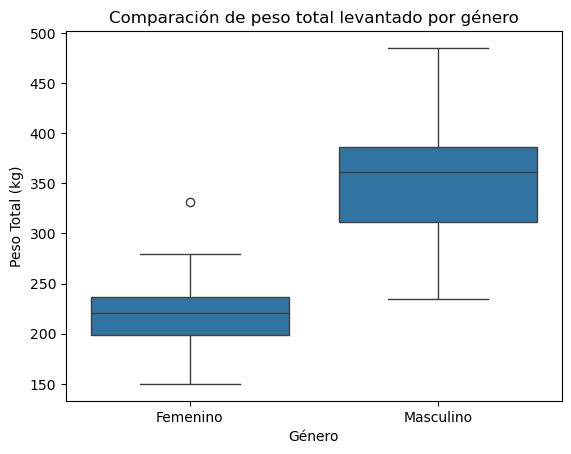

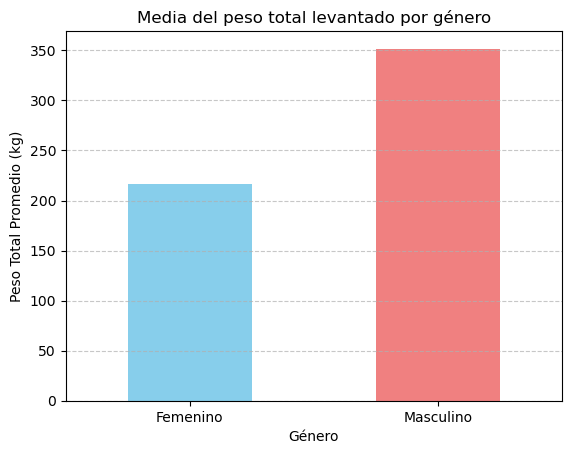

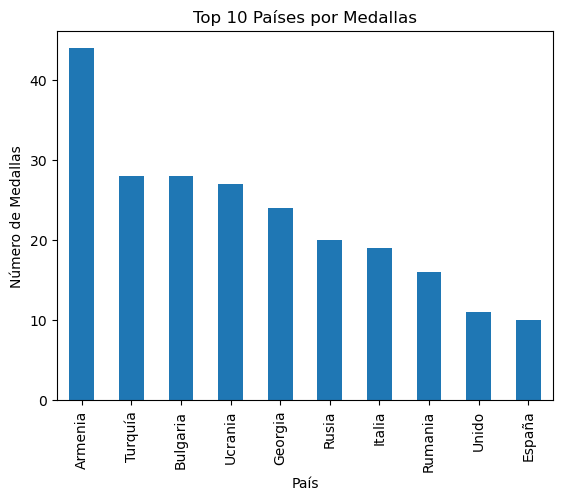

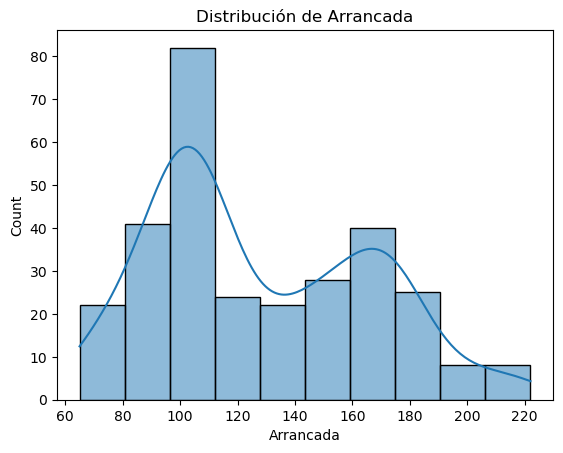

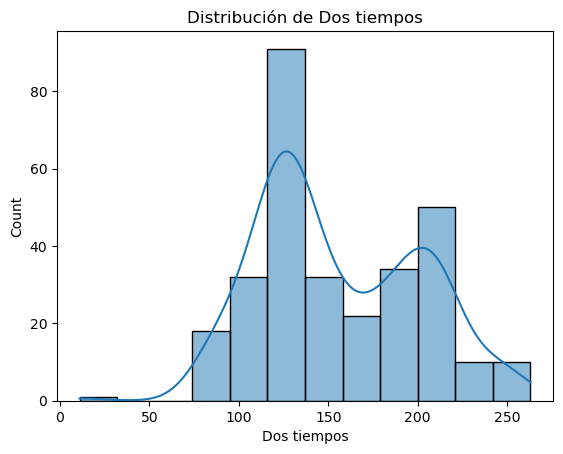

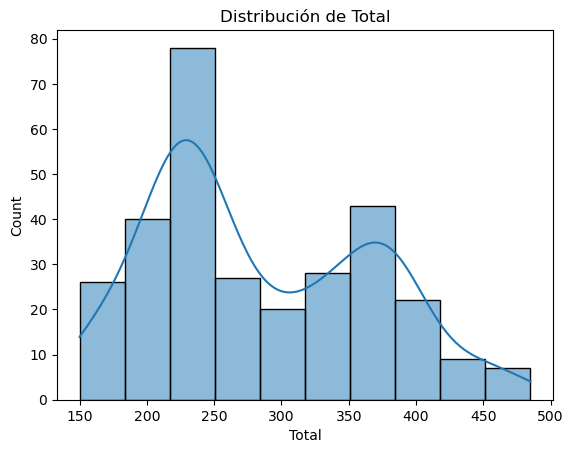

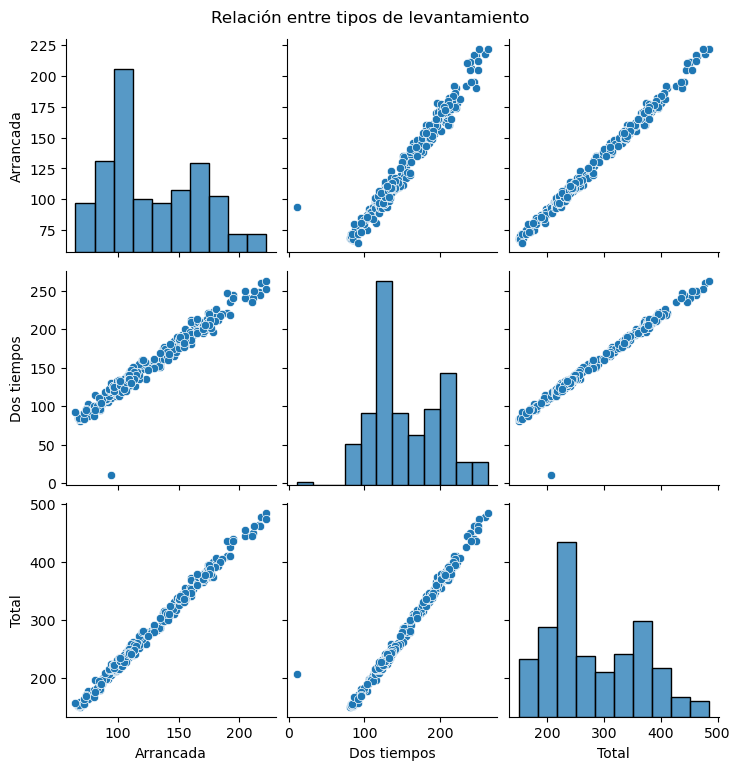

In [36]:

#Comparación de peso
df_EDAf2['Total'] = pd.to_numeric(df_EDAf2['Total'], errors='coerce')
sns.boxplot(data=df_EDAf2, x='Genero', y='Total')
plt.title('Comparación de peso total levantado por género')
plt.ylabel('Peso Total (kg)')
plt.xlabel('Género')
plt.show()

#Media por género
medias = df_EDAf2.groupby('Genero')['Total'].mean()
medias.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Media del peso total levantado por género')
plt.ylabel('Peso Total Promedio (kg)')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Medallas por país
medallas_pais = df_EDAf2[df_EDAf2['Medalla'].notnull()].groupby('País')['Medalla'].count().sort_values(ascending=False)
medallas_pais.head(10).plot(kind='bar')
plt.title('Top 10 Países por Medallas')
plt.ylabel('Número de Medallas')
plt.show()

#Distribución de "Arrancada", "Dos tiempos" y "Total"
for col in ['Arrancada', 'Dos tiempos', 'Total']:
    sns.histplot(data=df_EDAf2, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

#Relación entre pesos levantados
sns.pairplot(df_EDAf2[['Arrancada', 'Dos tiempos', 'Total']])
plt.suptitle('Relación entre tipos de levantamiento', y=1.02)
plt.show()


## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

Medalla   Oro  Plata  Bronce
País                        
AIN         1      1       2
Albania     1      2       1
Alemania    1      3       3
Armenia    14     13      17
Austria     0      0       2


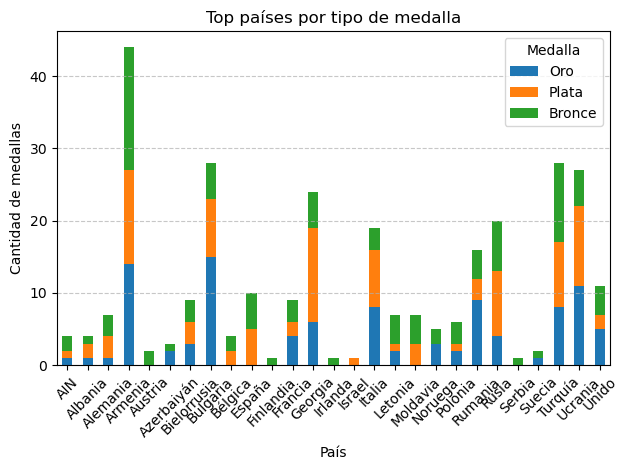

In [37]:
#Filtro de filas con medalla
medallas = df_EDAf2[df_EDAf2['Medalla'].notnull()]

#Contar medallas por país y tipo
medallas_por_pais = medallas.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

#Mostrar pantalla
print(medallas_por_pais.head(5))

#Gráfico
medallas_por_pais.plot(kind='bar', stacked=True)
plt.title('Top países por tipo de medalla')
plt.ylabel('Cantidad de medallas')
plt.xlabel('País')
plt.legend(title='Medalla')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [38]:
#Filtrar filas con medalla
medallas = df_EDAf2[df_EDAf2['Medalla'].notnull()]

#Calcular medallas por país y tipo
conteo = medallas.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

#Calcular por tipo de medalla
top_oro = conteo.sort_values('Oro', ascending=False).head(3)
top_plata = conteo.sort_values('Plata', ascending=False).head(3)
top_bronce = conteo.sort_values('Bronce', ascending=False).head(3)

#Mostrar por pantalla
print("Top 3 países por medallas de ORO:")
print(top_oro[['Oro']])
print("\nTop 3 países por medallas de PLATA:")
print(top_plata[['Plata']])
print("\nTop 3 países por medallas de BRONCE:")
print(top_bronce[['Bronce']])


Top 3 países por medallas de ORO:
Medalla   Oro
País         
Bulgaria   15
Armenia    14
Ucrania    11

Top 3 países por medallas de PLATA:
Medalla  Plata
País          
Armenia     13
Georgia     13
Ucrania     11

Top 3 países por medallas de BRONCE:
Medalla  Bronce
País           
Armenia      17
Turquía      11
Rusia         7


### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

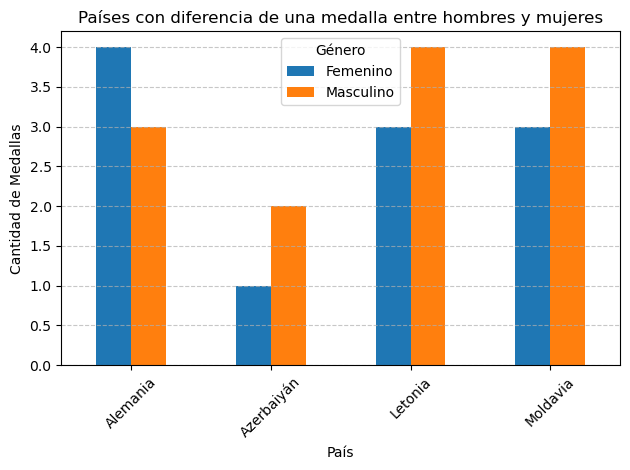

In [39]:
#Filtrar filas medalla
medallas = df_EDAf2[df_EDAf2['Medalla'].notnull()]

#Contar medallas 
medallas_genero = medallas.groupby(['País', 'Genero']).size().unstack(fill_value=0)

#Filtrar países con medallas en ambos géneros
medallas_genero_filtrado = medallas_genero[
    (medallas_genero.get('Masculino', 0) > 0) &
    (medallas_genero.get('Femenino', 0) > 0)
]

#Calcular diferencia
medallas_genero_filtrado['Diferencia'] = abs(
    medallas_genero_filtrado['Masculino'] - medallas_genero_filtrado['Femenino']
)

#Filtrar los que tienen diferencia
equilibrados_dif1 = medallas_genero_filtrado[medallas_genero_filtrado['Diferencia'] ==1]

#Quitar columna 'Diferencia' para mostrar gráfico
equilibrados_dif1_plot = equilibrados_dif1.drop(columns='Diferencia')

#Gráfico
equilibrados_dif1_plot.plot(kind='bar')
plt.title('Países con diferencia de una medalla entre hombres y mujeres')
plt.ylabel('Cantidad de Medallas')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [40]:
#Contar número de atletas por país y género
conteo_atletas = df_EDAf2.groupby(['País', 'Genero'])['Nombre'].nunique().unstack(fill_value=0)

#Filtrar países con igual número de hombres y mujeres
paises_balanceados = conteo_atletas[conteo_atletas['Masculino'] == conteo_atletas['Femenino']].index
print(paises_balanceados)

#Filtrar el DataFrame original solo con esos países
#df_equilibrado = df_EDAf2[df_EDAf2['País'].isin(paises_balanceados)]
#df_equilibrado

Index(['Azerbaiyán', 'Italia'], dtype='object', name='País')


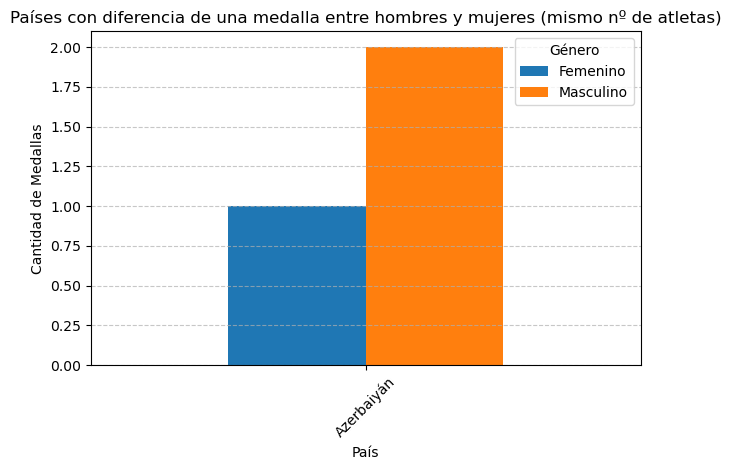

In [41]:

#Asegurar que los datos están limpios
df_EDAf2['Medalla'] = df_EDAf2['Medalla'].astype(str)
df_EDAf2 = df_EDAf2.dropna(subset=['Genero', 'País', 'Nombre'])

#Contar número de atletas por país y género
conteo_atletas = df_EDAf2.groupby(['País', 'Genero'])['Nombre'].nunique().unstack(fill_value=0)

#Filtrar países con mismo número de hombres y mujeres
paises_balanceados = conteo_atletas[conteo_atletas.get('Masculino', 0) == conteo_atletas.get('Femenino', 0)].index

#Filtrar DataFrame con esos países
df_equilibrado = df_EDAf2[df_EDAf2['País'].isin(paises_balanceados)]

#Filtrar filas con medalla
medallas = df_equilibrado[df_equilibrado['Medalla'].notnull()]

#Contar medallas por país y género
medallas_genero = medallas.groupby(['País', 'Genero']).size().unstack(fill_value=0)

#Filtrar países con medallas en ambos géneros
medallas_genero_filtrado = medallas_genero[(medallas_genero.get('Masculino', 0) > 0) & (medallas_genero.get('Femenino', 0) > 0)]

#Calcular diferencia absoluta
medallas_genero_filtrado['Diferencia'] = abs(medallas_genero_filtrado['Masculino'] - medallas_genero_filtrado['Femenino'])

#Quedarse con diferencia exacta de 1
equilibrados_dif1 = medallas_genero_filtrado[medallas_genero_filtrado['Diferencia'] == 1]

#Preparar para graficar
equilibrados_dif1_plot = equilibrados_dif1.drop(columns='Diferencia')

#Gráfico
equilibrados_dif1_plot.plot(kind='bar')
plt.title('Países con diferencia de una medalla entre hombres y mujeres (mismo nº de atletas)')
plt.ylabel('Cantidad de Medallas')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

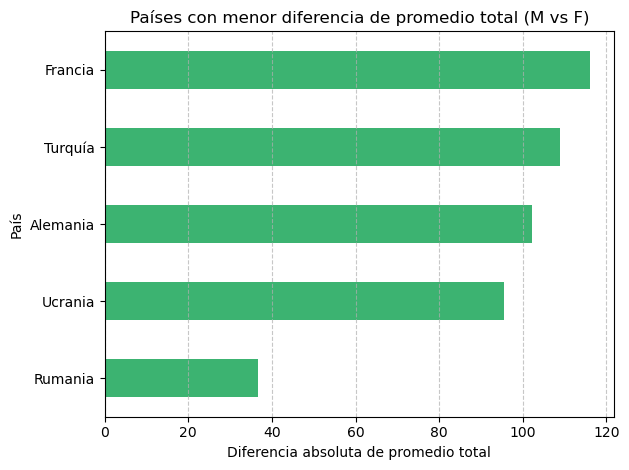

In [42]:
#Promedio de 'Total' por pais y genero
promedios = df_EDAf2.groupby(['País', 'Genero'])['Total'].mean().unstack()

#Calcular la diferencia absoluta entre medias por pais
promedios['Diferencia'] = (promedios['Masculino'] - promedios['Femenino']).abs()

#Ordenar por menor diferencia
promedios_ordenado = promedios.sort_values('Diferencia')

#Mostrar por pantalla
#Print("Pais con menor diferencia:")
#Print(promedios_ordenado.head())

#Gráfico
promedios_ordenado.head()['Diferencia'].plot(kind='barh', color='mediumseagreen')
plt.title('Países con menor diferencia de promedio total (M vs F)')
plt.xlabel('Diferencia absoluta de promedio total')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()